In [1]:
#!pip install --user transformers




In [2]:
#!pip install --user torch


In [3]:
#!pip install torchtext==0.6.0

In [4]:
#!pip install transformers datasets
#!pip install git-lfs

In [5]:
import warnings
warnings.filterwarnings("ignore")


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import string
import random
import timeit
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from tqdm.auto import tqdm

from IPython.display import HTML,display
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import nltk

import tqdm
import torch
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from transformers import BertModel, BertTokenizer
from sklearn.metrics import accuracy_score, roc_curve, auc
import torch.nn.functional as F
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khoxh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
tips_dataset = pd.read_csv("reviews_0-250.csv")

In [7]:
tips_dataset.head()


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [8]:
tips_dataset = tips_dataset [['review_text' , 'rating' ]]
# change column names
tips_dataset.rename(columns={'review_text':'text', 'rating':'rate'},  inplace=True)
tips_dataset.head()


,text,rate
0,I use this with the Nudestix “Citrus Clean Bal...,5
1,I bought this lip mask after reading the revie...,1
2,My review title says it all! I get so excited ...,5
3,I’ve always loved this formula for a long time...,5
4,"If you have dry cracked lips, this is a must h...",5


In [9]:
tips_dataset.dropna(axis=0, inplace=True)

In [10]:
import pandas as pd
import numpy as np
import torch
import torchtext
import torchtext.data as data
from sklearn.model_selection import train_test_split
from transformers import DistilBertForSequenceClassification, AdamW, DistilBertTokenizer

# Create sentiment labels based on rating
def create_sentiment_label(rating):
    if rating <= 2:
        return 0
    elif rating == 5:
        return 2
    else:
        return 1

# Filter relevant columns and create sentiment labels
tips_dataset = tips_dataset[['text', 'rate']]
tips_dataset['sentiment'] = tips_dataset['rate'].apply(create_sentiment_label)

# Save the preprocessed data to new CSV files
tips_dataset = tips_dataset[['text', 'sentiment']]
tips_dataset.sample(frac=1).reset_index(drop=True)  # Shuffle the data





,text,sentiment
0,This two step process worked okay! No complain...,1
1,I really love this product & store it in the f...,1
2,Our lord and savior tatcha has blessed us with...,1
3,Using this made my skin WAY worse. I had no re...,0
4,"This little jar goes a long way, you only need...",1
...,...,...
601126,This moisturizer has a rather sticky feel to i...,1
601127,"I have tried SO many makeup removers, and all ...",2
601128,Dr Dennis Gross alpha beta extra strength dail...,1
601129,My first bottle was ok. My face felt smooth af...,0


In [27]:
# set aside 0.2% of data for test and 0.4% for train as its too much data 
tips_dataset_train , tips_dataset_test = train_test_split(tips_dataset , test_size=0.002, train_size= 0.004, shuffle = True, random_state = 40)

In [28]:
tips_dataset_train.to_csv("train.csv", index=False)
tips_dataset_test.to_csv("test.csv", index=False)


In [29]:
display(tips_dataset_train)

,text,sentiment
41812,I really like these Dr. Dennis Gross alpha bet...,2
43523,I really felt the difference in 5 treatments i...,1
272917,This product has singularly changed the textur...,2
48710,One of the best moisturizers I’ve ever tried! ...,2
571067,Love this! Helps remove the dead skin on a dai...,1
...,...,...
344691,I received this product complimentary from Inf...,1
355750,"So, I tried a free sample, and it has a nice s...",1
157261,I enjoyed this face wash. It is creamy and wor...,1
461553,I received this toner complimentary for testin...,2


In [30]:
display(tips_dataset_test)

,text,sentiment
545283,"Overall, I do like it. I like the idea of putt...",1
27146,I have oily skin and prior to argan I was usin...,2
335806,I got a deluxe sample a while back and plan on...,1
575122,This cleanser is great. It actually emulsifie...,1
28943,I bought the small bottle of this to try it ou...,2
...,...,...
7646,I think this product is ok. It works like a li...,1
311780,Love love love this. Leaves my skin feeling ve...,2
104910,I absolutely love the Rosebud Salves. They com...,2
383970,Anyone who uses prescription strength vitamin ...,2


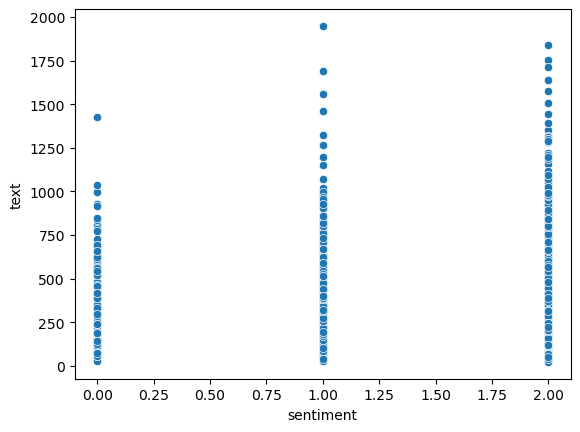

In [31]:
sns.scatterplot(x=tips_dataset_train['sentiment'], y=tips_dataset_train['text'].str.len())
plt.show()

Class distribution:
 2    388272
1    150809
0     62050
Name: sentiment, dtype: int64


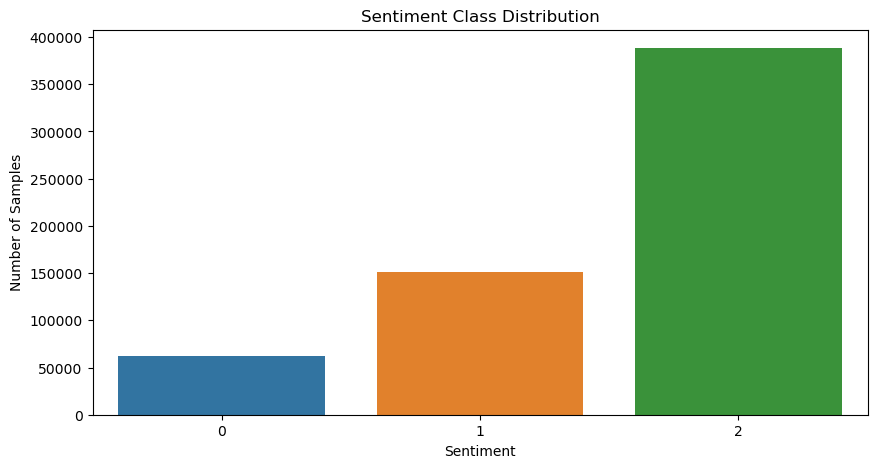

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = tips_dataset['sentiment'].value_counts()
print("Class distribution:\n", class_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Samples")
plt.show()